<a href="https://colab.research.google.com/github/BitnooriLee/Applied-Machine-Learning/blob/main/Thesis_part2_Rev2_with_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2

In [ ]:
import os
import pandas as pd
# Import Data set
from google.colab import drive
drive.mount('/content/gdrive')

# specify the path to the .xlsx files
path = '/content/gdrive/My Drive/MasterThesis2023/data/high_temp_filtered/'

# list to store the data from each .xlsx file
data_frames_parameters = []
data_frames_results = []
data_frames_T_t = []

# loop through each .xlsx file in the path
for file in os.listdir(path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(path, file)
        try:
            # read the 'Parameters' sheet from the current .xlsx file
            df_parameters = pd.read_excel(file_path, sheet_name='Parameters',header=1, engine='openpyxl')
            df_results = pd.read_excel(file_path, sheet_name='Results',header=1, engine='openpyxl')
            df_T_t = pd.read_excel(file_path, sheet_name='T-t',header=3, engine='openpyxl')
            # add the data from the current .xlsx file to the list of data_frames
            data_frames_parameters.append(df_parameters)
            data_frames_results.append(df_results)
            data_frames_T_t.append(df_T_t.T)
        except FileNotFoundError:
            print(f"The file {file_path} was not found. Skipping...")

# concatenate all the data from the data_frames list into one dataframe
result_parameters = pd.concat(data_frames_parameters)
result_results = pd.concat(data_frames_results)
result_T_t = pd.concat(data_frames_T_t)

# remove duplicates
result_parameters = result_parameters[result_parameters.index == 0]
result_results = result_results[result_results.index == 0]

# write the result dataframe to a new excel file
result_parameters.to_excel("combined_data_parameters.xlsx", index=False)
result_results.to_excel("combined_data_results.xlsx", index=False)

# read the combined data from the newly created excel file
combined_data_parameters = pd.read_excel("combined_data_parameters.xlsx", engine='openpyxl')
combined_data_results = pd.read_excel("combined_data_results.xlsx", engine='openpyxl')

combined_data_parameters_select = combined_data_parameters[['File','Outp.power.','Radius','TCR','Temperature']]

combined_data_results_select = combined_data_results[['File','Disk Res.','Th.Conductivity']]

merged_result = pd.merge(combined_data_parameters_select, combined_data_results_select, on='File')

merged_result[['Th.Conductivity', 'Disk Res.','Outp.power.','Radius','TCR','Temperature']] = merged_result[['Th.Conductivity', 'Disk Res.','Outp.power.','Radius','TCR','Temperature']].apply(lambda x: pd.to_numeric(x))

# list to store the data from each .xlsx file
data_frames_T_t_time = []
data_frames_T_t_temp = []

# loop through each .xlsx file in the path
for file in os.listdir(path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(path, file)
        try:
            # read the 'Parameters' sheet from the current .xlsx file
            df_T_t_new = pd.read_excel(file_path, sheet_name='T-t',header=3, engine='openpyxl')

            # add a new column 'File' to the dataframe
            df_T_t_new['File'] = file

            if 'Time' in df_T_t_new.columns and 'Temp' in df_T_t_new.columns:
                data_frames_T_t_time.append(df_T_t_new[['Time']].transpose())
                data_frames_T_t_temp.append(df_T_t_new[['Temp']].transpose())

        except FileNotFoundError:
            print(f"The file {file_path} was not found. Skipping...")

# concatenate all the data from the data_frames list into one dataframe

result_T_t_time = pd.concat(data_frames_T_t_time, axis=0)
result_T_t_temp = pd.concat(data_frames_T_t_temp, axis=0)


# write the result dataframe to a new excel file
result_T_t_time.to_excel("combined_data_T_t_time.xlsx", index=False)
result_T_t_temp.to_excel("combined_data_T_t_temp.xlsx", index=False)

# read the combined data from the newly created excel file
combined_data_T_t_time = pd.read_excel("combined_data_T_t_time.xlsx", engine='openpyxl')
combined_data_T_t_temp = pd.read_excel("combined_data_T_t_temp.xlsx", engine='openpyxl')
combined_data_T_t_time = combined_data_T_t_time.iloc[:, 50:150]
combined_data_T_t_temp = combined_data_T_t_temp.iloc[:, 50:150]

combined_data_T_t_time_sqrt = combined_data_T_t_time**(1/2)


time_temp_result = pd.concat([combined_data_T_t_time, combined_data_T_t_temp], axis=1)
time_temp_result_sqrt = pd.concat([combined_data_T_t_time_sqrt, combined_data_T_t_temp], axis=1)

n = combined_data_T_t_time.shape[1]

# create a list of column indices in the desired order
column_indices = [i//2 + n*(i%2) for i in range(2*n)]

# shuffle the DataFrame columns using the list of indices
time_temp_result_shuffled = time_temp_result.iloc[:, column_indices]

# print the shuffled DataFrame
time_temp_result_shuffled

# normalized temp
normalized_factor =merged_result['Outp.power.']/merged_result['Radius'] #pow/radious
normalized_factor.to_frame()
result_T_t_temp_normalized = result_T_t_temp.mul(normalized_factor[0], axis=0)

result_T_t_temp_normalized.to_excel("combined_data_T_t_temp_normalized.xlsx", index=False)

# read the combined data from the newly created excel file

combined_data_T_t_temp_normalized = pd.read_excel("combined_data_T_t_temp_normalized.xlsx", engine='openpyxl')
combined_data_T_t_temp_normalized = combined_data_T_t_temp_normalized.iloc[:, 50:150]

time_temp_result_normalized = pd.concat([combined_data_T_t_time, combined_data_T_t_temp_normalized], axis=1)

merge_t_parameter_result_normalized = pd.concat([time_temp_result_normalized, merged_result], axis=1)
merge_t_parameter_result_normalized =  merge_t_parameter_result_normalized.drop('File', axis=1)
merge_t_parameter_result_normalized =  merge_t_parameter_result_normalized.drop('Outp.power.', axis=1)
merge_t_parameter_result_normalized =  merge_t_parameter_result_normalized.drop('Radius', axis=1)

merge_t_parameter_result = pd.concat([time_temp_result, merged_result], axis=1)
merge_t_parameter_result =  merge_t_parameter_result.drop('File', axis=1)

merge_t_parameter_result_sqrt = pd.concat([time_temp_result_sqrt, merged_result], axis=1)
merge_t_parameter_result_sqrt =  merge_t_parameter_result_sqrt.drop('File', axis=1)

merge_t_parameter_shuffled_result = pd.concat([time_temp_result_shuffled, merged_result], axis=1)
merge_t_parameter_shuffled_result = merge_t_parameter_shuffled_result.drop('File', axis=1)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
merged_result

,File,Outp.power.,Radius,TCR,Temperature,Disk Res.,Th.Conductivity
0,C:\Besira\Application note\RTto_neg10_100bath....,400.0,6.403,0.005854,-10.020000,11.790839,1.293578
1,C:\Besira\Application note\RT,400.0,6.403,0.005153,22.256376,13.139934,1.389262
2,973,1.5,9.719,0.000510,973.000000,32.021797,6.710017
3,950,1.5,9.719,0.000523,954.000000,31.862032,2.560802
4,850,1.5,9.719,0.000602,853.000000,30.408412,3.974821
5,750,1.5,9.719,0.000692,753.000000,28.211545,3.922175
6,700,1.5,9.719,0.000745,702.000000,27.087516,3.060212
7,650,1.5,9.719,0.000802,651.000000,26.098664,3.298759
8,600,1.5,9.719,0.000860,600.000000,25.177435,3.054016
9,550,1.5,9.719,0.000917,549.000000,24.219203,2.784233


In [ ]:
merge_t_parameter_result

,50,51,52,53,54,55,56,57,58,59,...,146,147,148,149,Outp.power.,Radius,TCR,Temperature,Disk Res.,Th.Conductivity
0,5.100000,5.200000,5.300000,5.400000,5.500000,5.600000,5.700000,5.800000,5.900000,6.000000,...,3.625654,3.632531,3.639426,3.646261,400.0,6.403,0.005854,-10.020000,11.790839,1.293578
1,5.100000,5.200000,5.300000,5.400000,5.500000,5.600000,5.700000,5.800000,5.900000,6.000000,...,4.192659,4.199134,4.205513,4.211916,400.0,6.403,0.005153,22.256376,13.139934,1.389262
2,10.200000,10.400000,10.600000,10.800000,11.000000,11.200000,11.400000,11.600000,11.800000,12.000000,...,-5.996221,-5.985070,-5.919285,-5.866810,1.5,9.719,0.000510,973.000000,32.021797,6.710017
3,10.199995,10.399995,10.599995,10.799995,10.999994,11.199994,11.399994,11.599994,11.799994,11.999994,...,0.721958,0.731201,0.740481,0.749142,1.5,9.719,0.000523,954.000000,31.862032,2.560802
4,10.199995,10.399995,10.599995,10.799995,10.999994,11.199994,11.399994,11.599994,11.799994,11.999994,...,2.135982,2.141567,2.146897,2.152180,1.5,9.719,0.000602,853.000000,30.408412,3.974821
5,10.200000,10.400000,10.600000,10.800000,11.000000,11.200000,11.400000,11.600000,11.800000,12.000000,...,4.413592,4.419201,4.425095,4.430809,1.5,9.719,0.000692,753.000000,28.211545,3.922175
6,10.199995,10.399995,10.599995,10.799995,10.999994,11.199994,11.399994,11.599994,11.799994,11.999994,...,4.675287,4.678340,4.679409,4.681181,1.5,9.719,0.000745,702.000000,27.087516,3.060212
7,10.200000,10.400000,10.600000,10.800000,11.000000,11.200000,11.400000,11.600000,11.800000,12.000000,...,5.347093,5.354754,5.362024,5.368775,1.5,9.719,0.000802,651.000000,26.098664,3.298759
8,10.200000,10.400000,10.600000,10.800000,11.000000,11.200000,11.400000,11.600000,11.800000,12.000000,...,5.963822,5.971245,5.978791,5.986264,1.5,9.719,0.000860,600.000000,25.177435,3.054016
9,10.199995,10.399995,10.599995,10.799995,10.999994,11.199994,11.399994,11.599994,11.799994,11.999994,...,6.533499,6.541598,6.549774,6.557903,1.5,9.719,0.000917,549.000000,24.219203,2.784233


In [ ]:
combined_data_results_select.sort_values(by='Th.Conductivity', ascending=False)

,File,Disk Res.,Th.Conductivity
2,973,32.021797,6.710017
4,850,30.408412,3.974821
5,750,28.211545,3.922175
7,650,26.098664,3.298759
6,700,27.087516,3.060212
8,600,25.177435,3.054016
9,550,24.219203,2.784233
3,950,31.862032,2.560802
10,500,23.241071,2.514412
11,300,40.398208,1.678851


In [ ]:

merge_t_parameter_result.columns = merge_t_parameter_result.columns.astype(str)
merge_t_parameter_shuffled_result.columns = merge_t_parameter_shuffled_result.columns.astype(str)
merge_t_parameter_result_sqrt.columns = merge_t_parameter_result_sqrt.columns.astype(str)
merge_t_parameter_result_normalized.columns = merge_t_parameter_result_normalized.columns.astype(str)

In [ ]:
# Define the input data
Literature_Value = {
    'Temperature': [0, 50, 100, 150, 200, 250, 280, 300, 350, 400, 450, 550, 600, 650],
    'Th.Conductivity': [1.348, 1.436, 1.516, 1.57, 1.616, 1.654, 1.679, 1.696, 1.754, 1.825, 1.913, 2.135, 2.282, 2.445]
}

#Approach 1
Temp- Conductivity (Only measurement data)

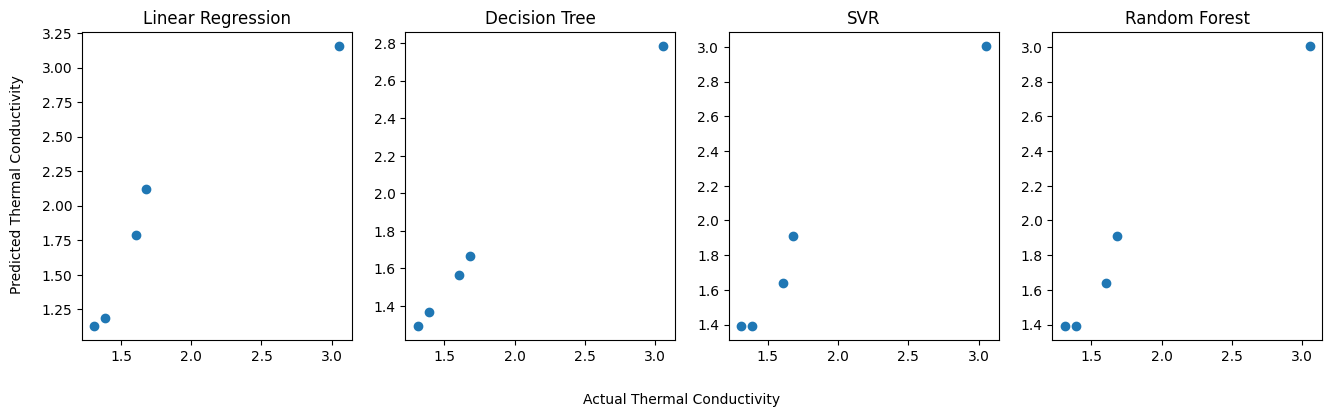

+-------------------+----------------------+--------------------+
|     Data Type     |  Mean Squared Error  |  R-squared score   |
+-------------------+----------------------+--------------------+
| Linear Regression | 0.06259532463759479  | 0.8460703567754977 |
|   Decision Tree   | 0.015087835598188307 | 0.9628971466462497 |
|        SVR        | 0.012925194369750486 | 0.9682153488385601 |
|   Random Forest   | 0.012925194369750486 | 0.9877452962243753 |
+-------------------+----------------------+--------------------+
0.063 & 0.846
0.015 & 0.963
0.013 & 0.968
0.013 & 0.988


In [ ]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


import numpy as np



scaler = MinMaxScaler()


X_t_T = merge_t_parameter_result.iloc[:, :-1]
y_t_T = merge_t_parameter_result.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized.iloc[:, -1]


X_t_T_temp = X_t_T[['Temperature']]

# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T_temp, y_t_T, test_size=0.2, random_state=0)



# Train a linear regression model
regressor1 = LinearRegression()
model1 = DecisionTreeRegressor(max_depth=5)
model2 = SVR(kernel='rbf', degree = 10)
model3 = RandomForestRegressor(n_estimators=1000, random_state=0)


regressor1.fit(X_train_t_T, y_train_t_T)
model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_t_T, y_train_t_T)
model3.fit(X_train_t_T, y_train_t_T)


# Make predictions on the testing data
y_pred_Linear = regressor1.predict(X_test_t_T)
y_pred_DT = model1.predict(X_test_t_T)
y_pred_SVR = model2.predict(X_test_t_T)
y_pred_RF = model2.predict(X_test_t_T)
#y_pred_nomalized = regressor4.predict(X_test_nomalized)




# Set up the plot grid
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Create scatter plots on each axis
axs[0].scatter(y_test_t_T, y_pred_Linear)
axs[1].scatter(y_test_t_T, y_pred_DT)
axs[2].scatter(y_test_t_T, y_pred_SVR)
axs[3].scatter(y_test_t_T, y_pred_RF)


# Add title to each subplot
axs[0].set_title('Linear Regression')
axs[1].set_title('Decision Tree')
axs[2].set_title('SVR')
axs[3].set_title('Random Forest')

# Set common x and y labels for the plot grid
fig.text(0.5, -0.05, "Actual Thermal Conductivity", ha='center')
fig.text(0.08, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_Linear = mean_squared_error(y_test_t_T, y_pred_Linear)
mse_DT = mean_squared_error(y_test_t_T, y_pred_DT)
mse_SVR = mean_squared_error(y_test_t_T, y_pred_SVR)
mse_RF = mean_squared_error(y_test_t_T, y_pred_RF)

from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['Linear Regression', mse_Linear, regressor1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Decision Tree ', mse_DT, model1.score(X_test_t_T, y_test_t_T)])
table.add_row(['SVR', mse_SVR, model2.score(X_test_t_T, y_test_t_T)])
table.add_row(['Random Forest', mse_RF, model3.score(X_test_t_T, y_test_t_T)])

# print the table as a formatted output
print(table)



# print rounded result

print(mse_Linear.round(3), '&', regressor1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_DT.round(3),'&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_SVR.round(3),'&', model2.score(X_test_t_T, y_test_t_T).round(3))
print(mse_RF.round(3),'&', model3.score(X_test_t_T, y_test_t_T).round(3))




#Approach 1-1
Temp- Conductivity (Measurement data for training // testing data for literature)

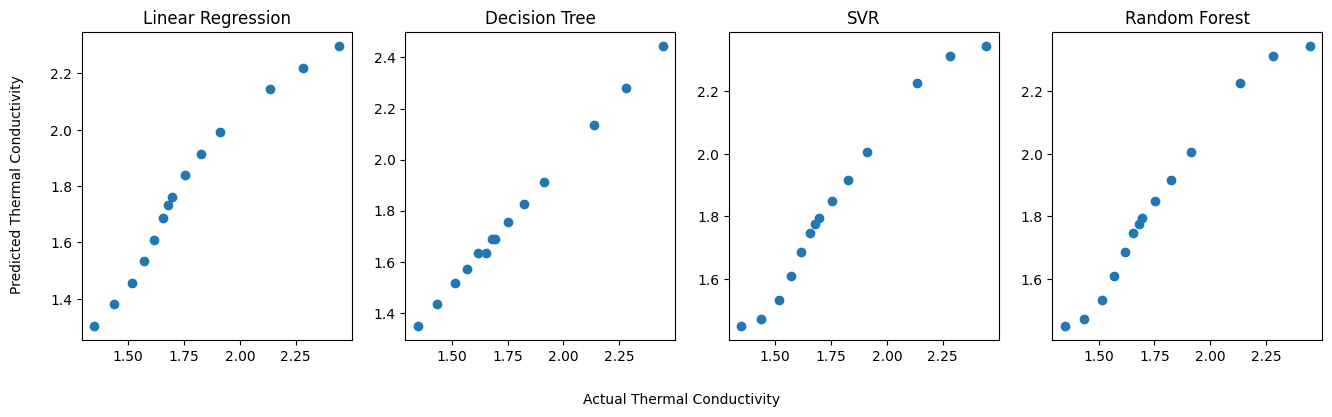

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


+-------------------+-----------------------+---------------------+
|     Data Type     |   Mean Squared Error  |   R-squared score   |
+-------------------+-----------------------+---------------------+
| Linear Regression |  0.00466678663736147  |  -1.91293804788461  |
|   Decision Tree   | 6.189285714285651e-05 | -3.8323159300475576 |
|        SVR        |  0.006461089892659839 | 0.10288395522180083 |
|   Random Forest   |  0.006461089892659839 |  -2.894040367634943 |
+-------------------+-----------------------+---------------------+
0.005 & -1.913
0.0 & -3.832
0.006 & 0.103
0.006 & -2.894


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from prettytable import PrettyTable


# Define the input data
Literature_Value = {
    'Temperature': [0, 50, 100, 150, 200, 250, 280, 300, 350, 400, 450, 550, 600, 650],
    'Th.Conductivity': [1.348, 1.436, 1.516, 1.57, 1.616, 1.654, 1.679, 1.696, 1.754, 1.825, 1.913, 2.135, 2.282, 2.445]
}

# Convert the input data to a DataFrame
df = pd.DataFrame(Literature_Value)

# Extract the features and target variables
X = df[['Temperature']]
y = df['Th.Conductivity']

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X_scaled, X_scaled, y, y

# Train the models
regressor = LinearRegression()
model1 = DecisionTreeRegressor(max_depth=5)
model2 = SVR(kernel='rbf', degree=10)
model3 = RandomForestRegressor(n_estimators=1000, random_state=0)

regressor.fit(X_train, y_train)
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_Linear = regressor.predict(X_test)
y_pred_DT = model1.predict(X_test)
y_pred_SVR = model2.predict(X_test)
y_pred_RF = model2.predict(X_test)

# Set up the plot grid
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Create scatter plots on each axis
axs[0].scatter(y_test, y_pred_Linear)
axs[1].scatter(y_test, y_pred_DT)
axs[2].scatter(y_test, y_pred_SVR)
axs[3].scatter(y_test, y_pred_RF)

# Add title to each subplot
axs[0].set_title('Linear Regression')
axs[1].set_title('Decision Tree')
axs[2].set_title('SVR')
axs[3].set_title('Random Forest')

# Set common x and y labels for the plot grid
fig.text(0.5, -0.05, "Actual Thermal Conductivity", ha='center')
fig.text(0.08, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the models using mean squared error
mse_Linear = mean_squared_error(y_test, y_pred_Linear)
mse_DT = mean_squared_error(y_test, y_pred_DT)
mse_SVR = mean_squared_error(y_test, y_pred_SVR)
mse_RF = mean_squared_error(y_test, y_pred_RF)

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['Linear Regression', mse_Linear, regressor1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Decision Tree ', mse_DT, model1.score(X_test_t_T, y_test_t_T)])
table.add_row(['SVR', mse_SVR, model2.score(X_test_t_T, y_test_t_T)])
table.add_row(['Random Forest', mse_RF, model3.score(X_test_t_T, y_test_t_T)])

# print the table as a formatted output
print(table)



# print rounded result

print(mse_Linear.round(3), '&', regressor1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_DT.round(3),'&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_SVR.round(3),'&', model2.score(X_test_t_T, y_test_t_T).round(3))
print(mse_RF.round(3),'&', model3.score(X_test_t_T, y_test_t_T).round(3))




#Polynoimial Fit for Literature_Value

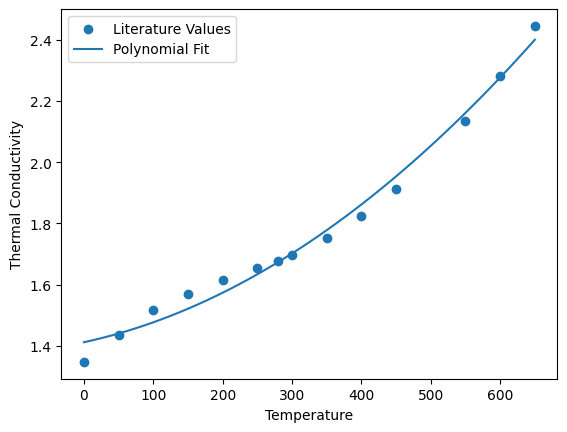

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input data
Temperature = Literature_Value['Temperature']
Th_Conductivity = Literature_Value['Th.Conductivity']

# Fit a polynomial of degree 2
degree = 2
coefficients = np.polyfit(Temperature, Th_Conductivity, degree)

# Generate the polynomial function
poly_func = np.poly1d(coefficients)

# Generate x values for the fitted curve
x_fit = np.linspace(min(Temperature), max(Temperature), 100)

# Calculate the corresponding y values using the polynomial function
y_fit = poly_func(x_fit)

# Plot the original data and the fitted curve
plt.scatter(Temperature, Th_Conductivity, label='Literature Values')
plt.plot(x_fit, y_fit, label='Polynomial Fit')
plt.xlabel('Temperature')
plt.ylabel('Thermal Conductivity')
plt.legend()
plt.show()


#Approach 2 with t-T Curve, measurement data only, without Temperature

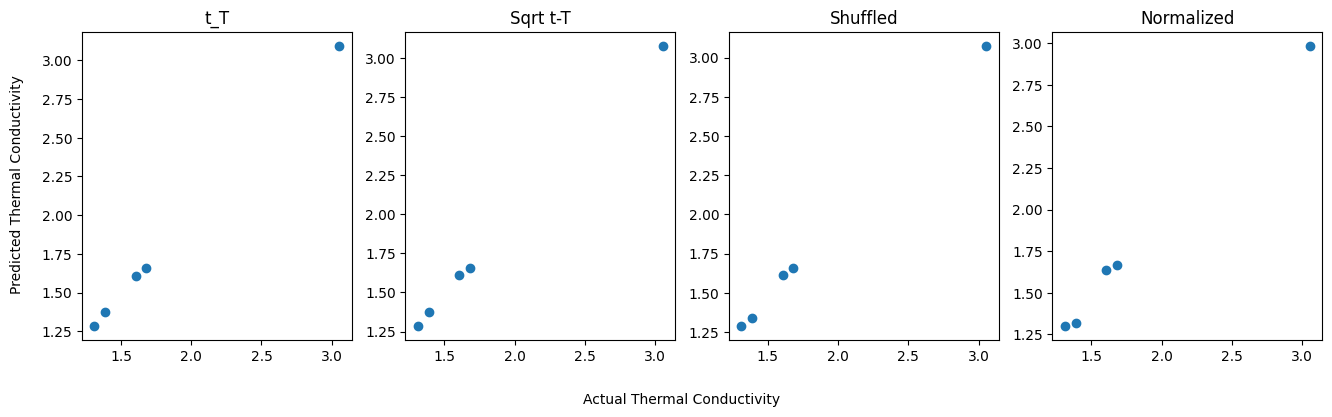

+------------+------------------------+--------------------+
| Data Type  |   Mean Squared Error   |  R-squared score   |
+------------+------------------------+--------------------+
|    t-T     | 0.0005916745110176256  | 0.9985449992165825 |
| Square t-T | 0.00034893419909141985 | 0.9991419276585601 |
|  Shuffled  | 0.0008142350283002874  | 0.9979976953848742 |
| Normalized | 0.0022677067118956153  | 0.9944234287924717 |
+------------+------------------------+--------------------+
0.001 & 0.999
0.0 & 0.999
0.001 & 0.998
0.002 & 0.994


In [ ]:
#Linear Regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()


# Import the data with 200 data points of temperature versus time and n independent parameters for each of the 48 materials

#merge_t_parameter_result = merge_t_parameter_result.apply(pd.to_numeric, errors='coerce')



# Split the data into features and target
#Remove 'Temperature'
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result.iloc[:, :-1]
y_t_T = merge_t_parameter_result.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized.iloc[:, -1]





# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)



# Scale the input features using StandardScaler
#scaler = StandardScaler()
#X_train_shuffled = scaler.fit_transform(X_train_shuffled)
# X_test_shuffled = scaler.transform(X_test_shuffled)


X_train_nomalized = scaler.fit_transform(X_train_nomalized)
X_test_nomalized = scaler.transform(X_test_nomalized)

X_train_shuffled = scaler.fit_transform(X_train_shuffled)
X_test_shuffled = scaler.transform(X_test_shuffled)

# Train a linear regression model
regressor1 = LinearRegression()
regressor2 = LinearRegression()
regressor3 = LinearRegression()
regressor4 = LinearRegression()

regressor1.fit(X_train_t_T, y_train_t_T)
regressor2.fit(X_train_sqrt,y_train_sqrt)
regressor3.fit(X_train_shuffled, y_train_shuffled)
regressor4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = regressor1.predict(X_test_t_T)
y_pred_sqrt = regressor2.predict(X_test_sqrt)
y_pred_shuffled = regressor3.predict(X_test_shuffled)
y_pred_nomalized = regressor4.predict(X_test_nomalized)


# Set up the plot grid
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Create scatter plots on each axis
axs[0].scatter(y_test_t_T, y_pred_t_T)
axs[1].scatter(y_test_sqrt, y_pred_sqrt)
axs[2].scatter(y_test_shuffled, y_pred_shuffled)
axs[3].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0].set_title('t_T')
axs[1].set_title('Sqrt t-T')
axs[2].set_title('Shuffled')
axs[3].set_title('Normalized')

# Set common x and y labels for the plot grid
fig.text(0.5, -0.05, "Actual Thermal Conductivity", ha='center')
fig.text(0.08, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)

from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['t-T', mse_t_T, regressor1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Square t-T', mse_sqrt, regressor2.score(X_test_sqrt, y_test_sqrt)])
table.add_row(['Shuffled', mse_shuffled, regressor3.score(X_test_shuffled, y_test_shuffled)])
table.add_row(['Normalized', mse_nomalized, regressor4.score(X_test_nomalized, y_test_nomalized)])

# print the table as a formatted output
print(table)



# print rounded result

print(mse_t_T.round(3), '&', regressor1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', regressor2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', regressor3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', regressor4.score(X_test_nomalized, y_test_nomalized).round(3))





#Compare Polynomial fit vs ML

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the polynomial fit
y_pred_poly = poly_func(Temperature)
mse_poly = mean_squared_error(Th_Conductivity, y_pred_poly)
r2_poly = r2_score(Th_Conductivity, y_pred_poly)

# Evaluate the machine learning models
y_pred_Linear = regressor.predict(X_test)
y_pred_DT = model1.predict(X_test)
y_pred_SVR = model2.predict(X_test)
y_pred_RF = model3.predict(X_test)

mse_Linear = mean_squared_error(y_test, y_pred_Linear)
mse_DT = mean_squared_error(y_test, y_pred_DT)
mse_SVR = mean_squared_error(y_test, y_pred_SVR)
mse_RF = mean_squared_error(y_test, y_pred_RF)

r2_Linear = r2_score(y_test, y_pred_Linear)
r2_DT = r2_score(y_test, y_pred_DT)
r2_SVR = r2_score(y_test, y_pred_SVR)
r2_RF = r2_score(y_test, y_pred_RF)

# Print the MSE and R-squared scores
print('Polynomial Fit:')
print('MSE:', mse_poly)
print('R-squared:', r2_poly)
print()

print('Linear Regression:')
print('MSE:', mse_Linear)
print('R-squared:', r2_Linear)
print()

print('Decision Tree:')
print('MSE:', mse_DT)
print('R-squared:', r2_DT)
print()

print('SVR:')
print('MSE:', mse_SVR)
print('R-squared:', r2_SVR)
print()

print('Random Forest:')
print('MSE:', mse_RF)
print('R-squared:', r2_RF)


Polynomial Fit:
MSE: 0.0011839902169480663
R-squared: 0.9874353243906979

Linear Regression:
MSE: 0.00466678663736147
R-squared: 0.9504753845116912

Decision Tree:
MSE: 6.189285714285651e-05
R-squared: 0.9993431840386845

SVR:
MSE: 0.006461089892659839
R-squared: 0.9314339785736829

Random Forest:
MSE: 0.0008289176005712767
R-squared: 0.9912034064057845


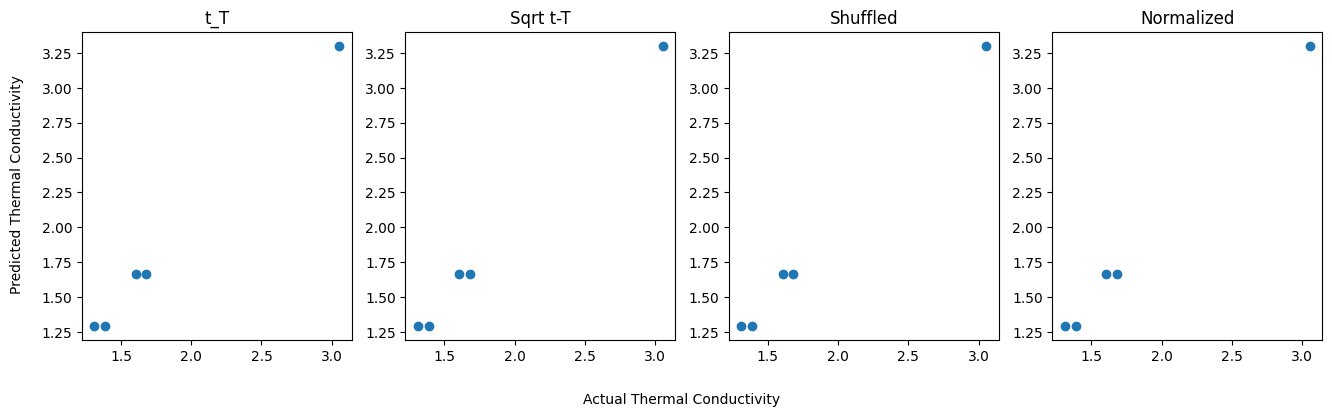

+------------+----------------------+--------------------+
| Data Type  |  Mean Squared Error  |  R-squared score   |
+------------+----------------------+--------------------+
|    t-T     | 0.014632722402847223 | 0.9640163262685492 |
| Square t-T | 0.014632722402847223 | 0.9640163262685492 |
|  Shuffled  | 0.014632722402847223 | 0.9640163262685492 |
| Normalized | 0.014632722402847223 | 0.9640163262685492 |
+------------+----------------------+--------------------+
0.015 & 0.964
0.015 & 0.964
0.015 & 0.964
0.015 & 0.964


In [ ]:
#DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
import numpy as np
# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized

X_t_T = merge_t_parameter_result.iloc[:, :-1]
y_t_T = merge_t_parameter_result.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized.iloc[:, -1]


# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)


# Fit a random forest regression model to the training data
model1 = DecisionTreeRegressor(max_depth=10)
model2 = DecisionTreeRegressor(max_depth=10)
model3 = DecisionTreeRegressor(max_depth=10)
model4 = DecisionTreeRegressor(max_depth=10)

model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_sqrt, y_train_sqrt)
model3.fit(X_train_shuffled, y_train_shuffled)
model4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = model1.predict(X_test_t_T)
y_pred_sqrt = model2.predict(X_test_sqrt)
y_pred_shuffled = model3.predict(X_test_shuffled)
y_pred_nomalized = model4.predict(X_test_nomalized)






# Set up the plot grid
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Create scatter plots on each axis
axs[0].scatter(y_test_t_T, y_pred_t_T)
axs[1].scatter(y_test_sqrt, y_pred_sqrt)
axs[2].scatter(y_test_shuffled, y_pred_shuffled)
axs[3].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0].set_title('t_T')
axs[1].set_title('Sqrt t-T')
axs[2].set_title('Shuffled')
axs[3].set_title('Normalized')

# Set common x and y labels for the plot grid
fig.text(0.5, -0.05, "Actual Thermal Conductivity", ha='center')
fig.text(0.08, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)



# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['t-T', mse_t_T, model1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Square t-T', mse_sqrt, model2.score(X_test_sqrt, y_test_sqrt)])
table.add_row(['Shuffled', mse_shuffled, model3.score(X_test_shuffled, y_test_shuffled)])
table.add_row(['Normalized', mse_nomalized, model4.score(X_test_nomalized, y_test_nomalized)])

# print the table as a formatted output
print(table)

print(mse_t_T.round(3), '&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', model2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', model3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', model4.score(X_test_nomalized, y_test_nomalized).round(3))



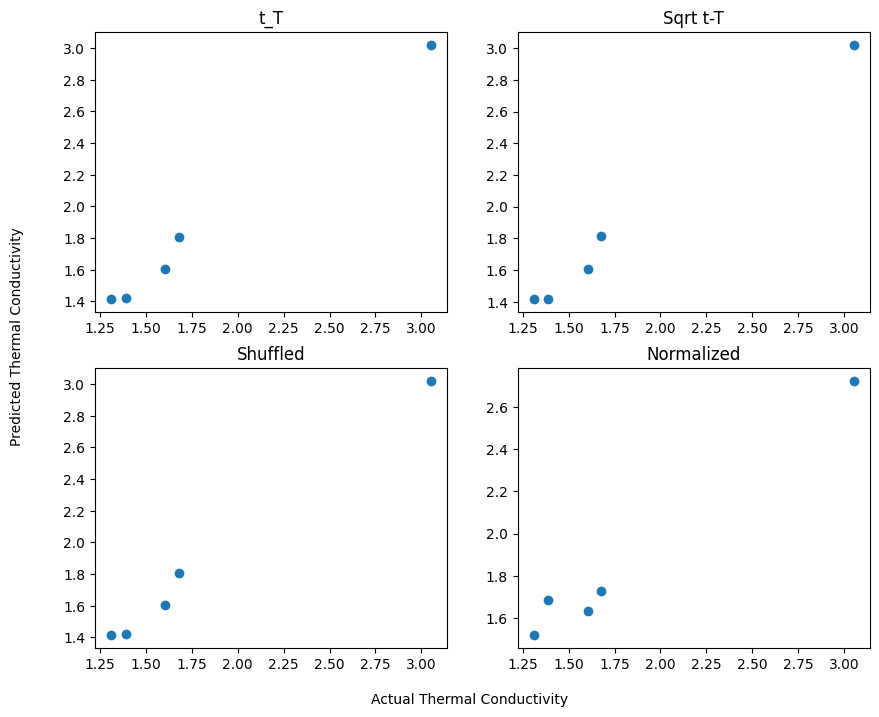

+------------+----------------------+--------------------+
| Data Type  |  Mean Squared Error  |  R-squared score   |
+------------+----------------------+--------------------+
|    t-T     | 0.005776897841142192 | 0.9857938938925586 |
| Square t-T | 0.006140127466365065 | 0.9849006673306254 |
|  Shuffled  | 0.005776897841142192 | 0.9857938938925586 |
| Normalized | 0.04842609596626711  | 0.8809142421099291 |
+------------+----------------------+--------------------+
0.006 & 0.986
0.006 & 0.985
0.006 & 0.986
0.048 & 0.881


In [ ]:

#SVR

from sklearn.svm import SVR
import numpy as np
# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


num_rows, num_cols = merge_t_parameter_result.shape
num_rows_norm, num_cols_norm = merge_t_parameter_result_normalized.shape

# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result.iloc[:, :-1]
y_t_T = merge_t_parameter_result.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized.iloc[:, -1]



# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)


from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regression model to the training data
model1 = SVR(kernel='rbf', degree = 10) #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model2 = SVR(kernel='rbf', degree = 10)
model3 = SVR(kernel='rbf', degree = 10)
model4 = SVR(kernel='rbf', degree = 10)

model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_sqrt, y_train_sqrt)
model3.fit(X_train_shuffled, y_train_shuffled)
model4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = model1.predict(X_test_t_T)
y_pred_sqrt = model2.predict(X_test_sqrt)
y_pred_shuffled = model3.predict(X_test_shuffled)
y_pred_nomalized = model4.predict(X_test_nomalized)



# Plot the actual versus predicted thermal conductivity values
# Set up the plot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create scatter plots on each axis
axs[0, 0].scatter(y_test_t_T, y_pred_t_T)
axs[0, 1].scatter(y_test_sqrt, y_pred_sqrt)
axs[1, 0].scatter(y_test_shuffled, y_pred_shuffled)
axs[1, 1].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0, 0].set_title('t_T')
axs[0, 1].set_title('Sqrt t-T')
axs[1, 0].set_title('Shuffled')
axs[1, 1].set_title('Normalized')


# Set common x and y labels for the plot grid
fig.text(0.5, 0.04, "Actual Thermal Conductivity", ha='center')
fig.text(0.04, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')



# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)




from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['t-T', mse_t_T, model1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Square t-T', mse_sqrt, model2.score(X_test_sqrt, y_test_sqrt)])
table.add_row(['Shuffled', mse_shuffled, model3.score(X_test_shuffled, y_test_shuffled)])
table.add_row(['Normalized', mse_nomalized, model4.score(X_test_nomalized, y_test_nomalized)])


# print the table as a formatted output
print(table)

print(mse_t_T.round(3), '&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', model2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', model3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', model4.score(X_test_nomalized, y_test_nomalized).round(3))


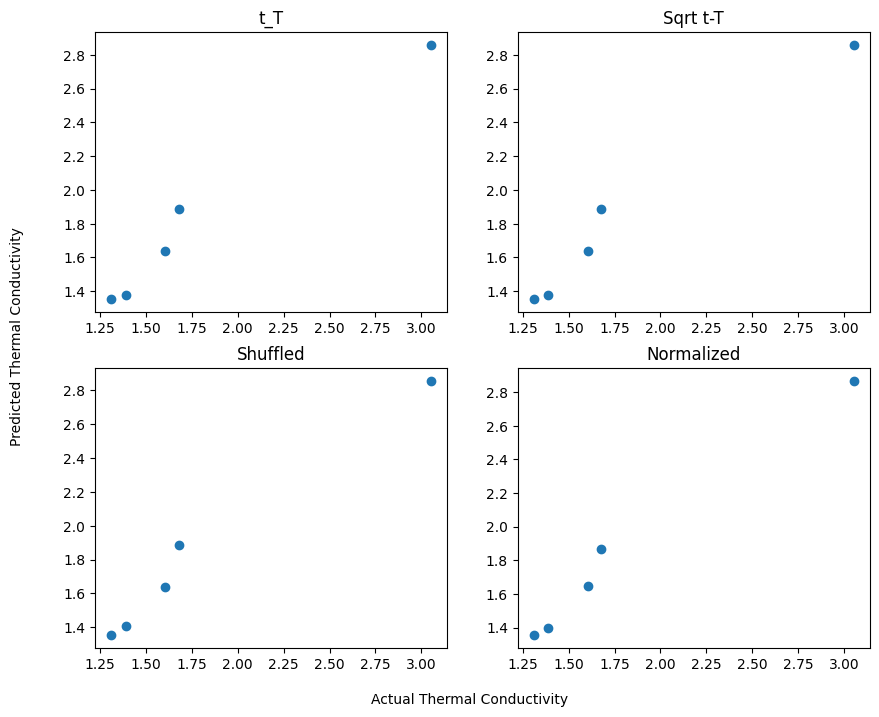

+------------+----------------------+--------------------+------------------------------+
| Data Type  |  Mean Squared Error  |  R-squared score   | Coefficient of determination |
+------------+----------------------+--------------------+------------------------------+
|    t-T     | 0.016983583001456998 | 0.9582352693715744 |      0.9582352693715744      |
| Square t-T | 0.016983583001456998 | 0.9582352693715744 |      0.9582352693715744      |
|  Shuffled  | 0.01688545366119737  | 0.9584765815530109 |      0.9584765815530109      |
| Normalized | 0.014816329504116066 | 0.9635648137034266 |      0.9635648137034266      |
+------------+----------------------+--------------------+------------------------------+
0.017 & 0.958
0.017 & 0.958
0.017 & 0.958
0.015 & 0.964


In [ ]:

#RandomForestRegressor  # filtered conductivity < 50

from sklearn.ensemble import RandomForestRegressor


num_rows, num_cols = merge_t_parameter_result.shape
num_rows_norm, num_cols_norm = merge_t_parameter_result_normalized.shape

# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result.iloc[:, :-1]
y_t_T = merge_t_parameter_result.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized.iloc[:, -1]




# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)

# Fit a random forest regression model to the training data
model1 = RandomForestRegressor(n_estimators=1000, random_state=0)
model2 = RandomForestRegressor(n_estimators=1000, random_state=0)
model3 = RandomForestRegressor(n_estimators=1000, random_state=0)
model4 = RandomForestRegressor(n_estimators=1000, random_state=0)

model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_sqrt, y_train_sqrt)
model3.fit(X_train_shuffled, y_train_shuffled)
model4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = model1.predict(X_test_t_T)
y_pred_sqrt = model2.predict(X_test_sqrt)
y_pred_shuffled = model3.predict(X_test_shuffled)
y_pred_nomalized = model4.predict(X_test_nomalized)



# Plot the actual versus predicted thermal conductivity values
# Set up the plot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create scatter plots on each axis
axs[0, 0].scatter(y_test_t_T, y_pred_t_T)
axs[0, 1].scatter(y_test_sqrt, y_pred_sqrt)
axs[1, 0].scatter(y_test_shuffled, y_pred_shuffled)
axs[1, 1].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0, 0].set_title('t_T')
axs[0, 1].set_title('Sqrt t-T')
axs[1, 0].set_title('Shuffled')
axs[1, 1].set_title('Normalized')


# Set common x and y labels for the plot grid
fig.text(0.5, 0.04, "Actual Thermal Conductivity", ha='center')
fig.text(0.04, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
r2_t_T = r2_score(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
r2_sqrt = r2_score(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
r2_shuffled = r2_score(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)
r2_nomalized = r2_score(y_test_nomalized, y_pred_nomalized)
cod_t_T = 1 - mse_t_T/np.var(y_test_t_T)
cod_sqrt = 1 - mse_sqrt/np.var(y_test_sqrt)
cod_shuffled = 1 - mse_shuffled/np.var(y_test_shuffled)
cod_nomalized = 1 - mse_nomalized/np.var(y_test_nomalized)

from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score', 'Coefficient of determination'])
table.add_row(['t-T', mse_t_T, model1.score(X_test_t_T, y_test_t_T),cod_t_T])
table.add_row(['Square t-T', mse_sqrt, model2.score(X_test_sqrt, y_test_sqrt),cod_sqrt])
table.add_row(['Shuffled', mse_shuffled, model3.score(X_test_shuffled, y_test_shuffled),cod_shuffled])
table.add_row(['Normalized', mse_nomalized, model4.score(X_test_nomalized, y_test_nomalized),cod_nomalized])


# print the table as a formatted output
print(table)


print(mse_t_T.round(3), '&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', model2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', model3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', model4.score(X_test_nomalized, y_test_nomalized).round(3))


#With Transient Curve, t-T

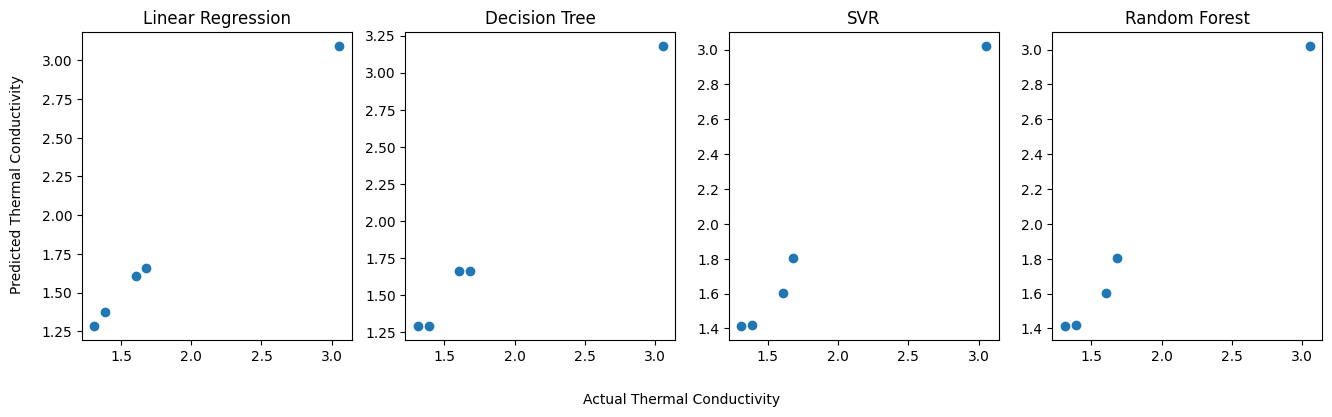

+-------------------+----------------------+--------------------+
|     Data Type     |  Mean Squared Error  |  R-squared score   |
+-------------------+----------------------+--------------------+
| Linear Regression | 0.016983583001456998 | 0.9985449992165825 |
|   Decision Tree   | 0.005776897841142192 | 0.9857335759320682 |
|        SVR        | 0.005776897841142192 | 0.9857938938925586 |
|   Random Forest   | 0.005776897841142192 | 0.9582352693715744 |
+-------------------+----------------------+--------------------+
0.001 & 0.999
0.006 & 0.986
0.006 & 0.986
0.006 & 0.958


In [ ]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


import numpy as np



scaler = MinMaxScaler()


X_t_T = merge_t_parameter_result.iloc[:, :-1]
y_t_T = merge_t_parameter_result.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized.iloc[:, -1]




# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)



# Train a linear regression model
regressor1 = LinearRegression()
model1 = DecisionTreeRegressor(max_depth=5)
model2 = SVR(kernel='rbf', degree = 10)
model3 = RandomForestRegressor(n_estimators=1000, random_state=0)


regressor1.fit(X_train_t_T, y_train_t_T)
model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_t_T, y_train_t_T)
model3.fit(X_train_t_T, y_train_t_T)


# Make predictions on the testing data
y_pred_Linear = regressor1.predict(X_test_t_T)
y_pred_DT = model1.predict(X_test_t_T)
y_pred_SVR = model2.predict(X_test_t_T)
y_pred_RF = model2.predict(X_test_t_T)
#y_pred_nomalized = regressor4.predict(X_test_nomalized)




# Set up the plot grid
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Create scatter plots on each axis
axs[0].scatter(y_test_t_T, y_pred_Linear)
axs[1].scatter(y_test_t_T, y_pred_DT)
axs[2].scatter(y_test_t_T, y_pred_SVR)
axs[3].scatter(y_test_t_T, y_pred_RF)


# Add title to each subplot
axs[0].set_title('Linear Regression')
axs[1].set_title('Decision Tree')
axs[2].set_title('SVR')
axs[3].set_title('Random Forest')

# Set common x and y labels for the plot grid
fig.text(0.5, -0.05, "Actual Thermal Conductivity", ha='center')
fig.text(0.08, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_Linear = mean_squared_error(y_test_t_T, y_pred_Linear)
mse_DT = mean_squared_error(y_test_t_T, y_pred_DT)
mse_SVR = mean_squared_error(y_test_t_T, y_pred_SVR)
mse_RF = mean_squared_error(y_test_t_T, y_pred_RF)

from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['Linear Regression', mse_t_T, regressor1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Decision Tree ', mse_RF, model1.score(X_test_t_T, y_test_t_T)])
table.add_row(['SVR', mse_SVR, model2.score(X_test_t_T, y_test_t_T)])
table.add_row(['Random Forest', mse_RF, model3.score(X_test_t_T, y_test_t_T)])

# print the table as a formatted output
print(table)



# print rounded result

print(mse_Linear.round(3), '&', regressor1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_DT.round(3),'&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_SVR.round(3),'&', model2.score(X_test_t_T, y_test_t_T).round(3))
print(mse_RF.round(3),'&', model3.score(X_test_t_T, y_test_t_T).round(3))




#Without Transident Curve but Only measurement data

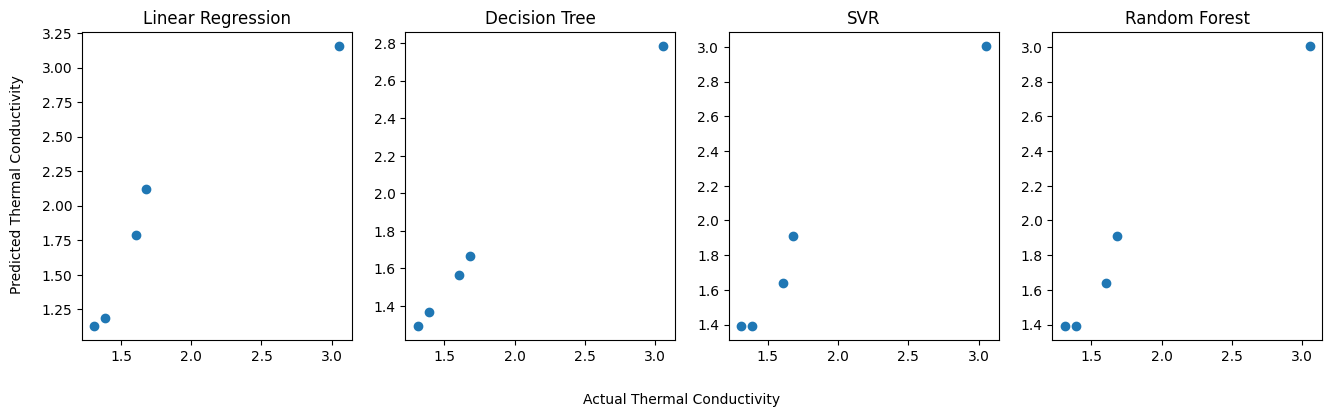

+-------------------+----------------------+--------------------+
|     Data Type     |  Mean Squared Error  |  R-squared score   |
+-------------------+----------------------+--------------------+
| Linear Regression | 0.016983583001456998 | 0.8460703567754977 |
|   Decision Tree   | 0.012925194369750486 | 0.9628971466462497 |
|        SVR        | 0.012925194369750486 | 0.9682153488385601 |
|   Random Forest   | 0.012925194369750486 | 0.9877452962243753 |
+-------------------+----------------------+--------------------+
0.063 & 0.846
0.015 & 0.963
0.013 & 0.968
0.013 & 0.988


In [ ]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


import numpy as np



scaler = MinMaxScaler()


X_t_T = merge_t_parameter_result.iloc[:, :-1]
y_t_T = merge_t_parameter_result.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized.iloc[:, -1]


X_t_T = X_t_T[['Temperature']]

# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)



# Train a linear regression model
regressor1 = LinearRegression()
model1 = DecisionTreeRegressor(max_depth=5)
model2 = SVR(kernel='rbf', degree = 10)
model3 = RandomForestRegressor(n_estimators=1000, random_state=0)


regressor1.fit(X_train_t_T, y_train_t_T)
model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_t_T, y_train_t_T)
model3.fit(X_train_t_T, y_train_t_T)


# Make predictions on the testing data
y_pred_Linear = regressor1.predict(X_test_t_T)
y_pred_DT = model1.predict(X_test_t_T)
y_pred_SVR = model2.predict(X_test_t_T)
y_pred_RF = model2.predict(X_test_t_T)
#y_pred_nomalized = regressor4.predict(X_test_nomalized)




# Set up the plot grid
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Create scatter plots on each axis
axs[0].scatter(y_test_t_T, y_pred_Linear)
axs[1].scatter(y_test_t_T, y_pred_DT)
axs[2].scatter(y_test_t_T, y_pred_SVR)
axs[3].scatter(y_test_t_T, y_pred_RF)


# Add title to each subplot
axs[0].set_title('Linear Regression')
axs[1].set_title('Decision Tree')
axs[2].set_title('SVR')
axs[3].set_title('Random Forest')

# Set common x and y labels for the plot grid
fig.text(0.5, -0.05, "Actual Thermal Conductivity", ha='center')
fig.text(0.08, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_Linear = mean_squared_error(y_test_t_T, y_pred_Linear)
mse_DT = mean_squared_error(y_test_t_T, y_pred_DT)
mse_SVR = mean_squared_error(y_test_t_T, y_pred_SVR)
mse_RF = mean_squared_error(y_test_t_T, y_pred_RF)

from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['Linear Regression', mse_t_T, regressor1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Decision Tree ', mse_RF, model1.score(X_test_t_T, y_test_t_T)])
table.add_row(['SVR', mse_SVR, model2.score(X_test_t_T, y_test_t_T)])
table.add_row(['Random Forest', mse_RF, model3.score(X_test_t_T, y_test_t_T)])

# print the table as a formatted output
print(table)



# print rounded result

print(mse_Linear.round(3), '&', regressor1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_DT.round(3),'&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_SVR.round(3),'&', model2.score(X_test_t_T, y_test_t_T).round(3))
print(mse_RF.round(3),'&', model3.score(X_test_t_T, y_test_t_T).round(3))




In [ ]:
Literature_Value = {
    'Temperature': [0, 50, 100, 150, 200, 250, 280, 300, 350, 400, 450, 550, 600, 650],
    'Th.Conductivity': [1.348, 1.436, 1.516, 1.57, 1.616, 1.654, 1.679, 1.696, 1.754, 1.825, 1.913, 2.135, 2.282, 2.445]
}

In [ ]:
for temp, actual_value in zip(Literature_Value['Temperature'], Literature_Value['Th.Conductivity']):
    predict_value = model3.predict([[temp]])[0]
    print(f"Temperature: {temp}, Th.Conductivity: {actual_value:.3f}, Predict_Th.Conductivity: {predict_value:.3f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Temperature: 0, Th.Conductivity: 1.348, Predict_Th.Conductivity: 1.319
Temperature: 50, Th.Conductivity: 1.436, Predict_Th.Conductivity: 1.388


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Temperature: 100, Th.Conductivity: 1.516, Predict_Th.Conductivity: 1.477
Temperature: 150, Th.Conductivity: 1.570, Predict_Th.Conductivity: 1.535


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Temperature: 200, Th.Conductivity: 1.616, Predict_Th.Conductivity: 1.620
Temperature: 250, Th.Conductivity: 1.654, Predict_Th.Conductivity: 1.620


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Temperature: 280, Th.Conductivity: 1.679, Predict_Th.Conductivity: 1.621
Temperature: 300, Th.Conductivity: 1.696, Predict_Th.Conductivity: 1.643


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Temperature: 350, Th.Conductivity: 1.754, Predict_Th.Conductivity: 1.956
Temperature: 400, Th.Conductivity: 1.825, Predict_Th.Conductivity: 2.498


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Temperature: 450, Th.Conductivity: 1.913, Predict_Th.Conductivity: 2.647
Temperature: 550, Th.Conductivity: 2.135, Predict_Th.Conductivity: 2.774
Temperature: 600, Th.Conductivity: 2.282, Predict_Th.Conductivity: 2.907


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Temperature: 650, Th.Conductivity: 2.445, Predict_Th.Conductivity: 3.226


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the input data
Literature_Value = {
    'Temperature': [0, 50, 100, 150, 200, 250, 280, 300, 350, 400, 450, 550, 600, 650],
    'Th.Conductivity': [1.348, 1.436, 1.516, 1.57, 1.616, 1.654, 1.679, 1.696, 1.754, 1.825, 1.913, 2.135, 2.282, 2.445]
}

# Prepare the data for modeling
X = np.array(Literature_Value['Temperature']).reshape(-1, 1)  # Reshape to a 2D array
y = Literature_Value['Th.Conductivity']

# Create the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Create a matrix to store the results
results = np.zeros((len(Literature_Value['Temperature']), 4))  # 4 columns: Temperature, Actual, Predicted, Error

# Fill the matrix with values
for i, (temp, actual_value) in enumerate(zip(Literature_Value['Temperature'], Literature_Value['Th.Conductivity'])):
    predict_value = model.predict([[temp]])[0]
    error = actual_value - predict_value
    results[i] = [temp, actual_value, predict_value, error]

# Print the matrix
print("Temperature\tActual\t\tPredicted\tError")
for row in results:
    print(f"{row[0]}\t\t{row[1]:.3f}\t\t{row[2]:.3f}\t\t{row[3]:.3f}")


Temperature	Actual		Predicted	Error
0.0		1.348		1.304		0.044
50.0		1.436		1.380		0.056
100.0		1.516		1.456		0.060
150.0		1.570		1.533		0.037
200.0		1.616		1.609		0.007
250.0		1.654		1.686		-0.032
280.0		1.679		1.732		-0.053
300.0		1.696		1.762		-0.066
350.0		1.754		1.839		-0.085
400.0		1.825		1.915		-0.090
450.0		1.913		1.991		-0.078
550.0		2.135		2.144		-0.009
600.0		2.282		2.221		0.061
650.0		2.445		2.297		0.148


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

Temperature	Actual		Predicted	Error (%)
0.0		1.348		1.304		0.044
50.0		1.436		1.380		0.056
100.0		1.516		1.456		0.060
150.0		1.570		1.533		0.037
200.0		1.616		1.609		0.007
250.0		1.654		1.686		-0.032
280.0		1.679		1.732		-0.053
300.0		1.696		1.762		-0.066
350.0		1.754		1.839		-0.085
400.0		1.825		1.915		-0.090
450.0		1.913		1.991		-0.078
550.0		2.135		2.144		-0.009
600.0		2.282		2.221		0.061
650.0		2.445		2.297		0.148


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


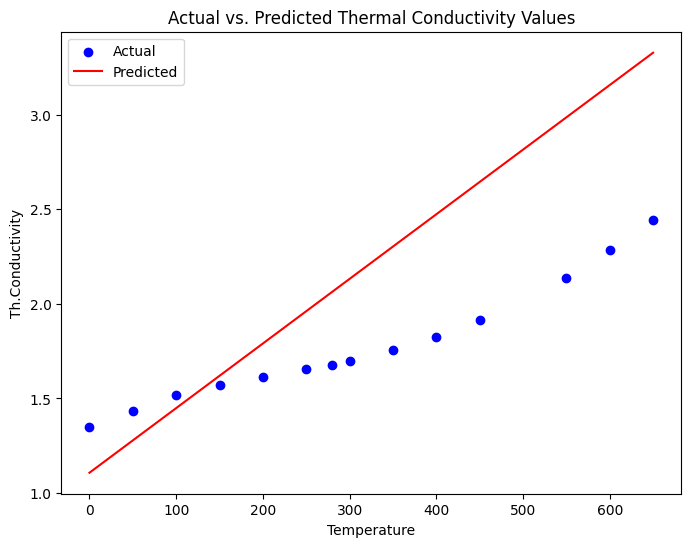

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


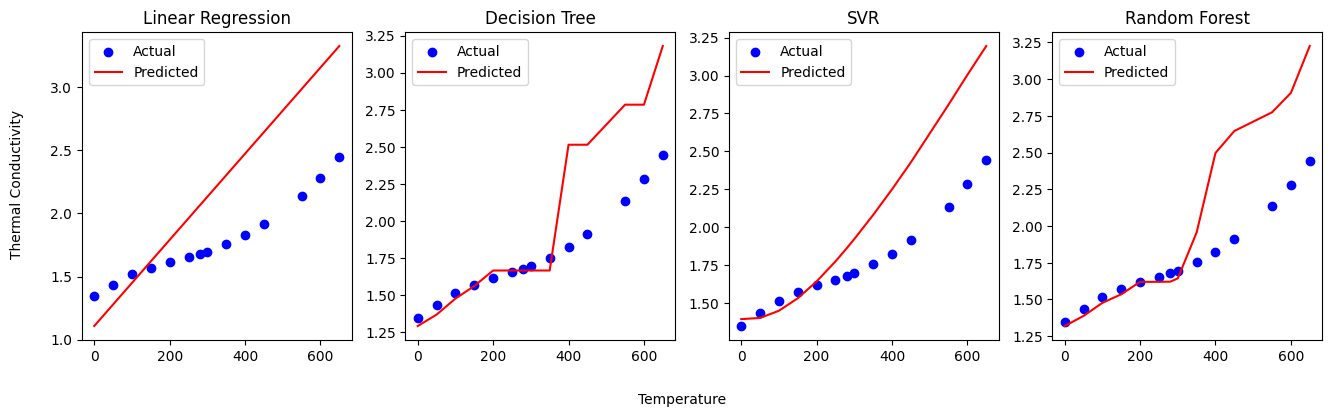

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Define the input data
Literature_Value = {
    'Temperature': [0, 50, 100, 150, 200, 250, 280, 300, 350, 400, 450, 550, 600, 650],
    'Th.Conductivity': [1.348, 1.436, 1.516, 1.57, 1.616, 1.654, 1.679, 1.696, 1.754, 1.825, 1.913, 2.135, 2.282, 2.445]
}

# Prepare the data for modeling
X = np.array(Literature_Value['Temperature']).reshape(-1, 1)  # Reshape to a 2D array
y = Literature_Value['Th.Conductivity']

# Create the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Create a matrix to store the results
results_Linear = np.zeros((len(Literature_Value['Temperature']), 4))  # 4 columns: Temperature, Actual, Predicted, Error (%)
results_DT = np.zeros((len(Literature_Value['Temperature']), 4))  # 4 columns: Temperature, Actual, Predicted, Error (%)
results_SVR = np.zeros((len(Literature_Value['Temperature']), 4))  # 4 columns: Temperature, Actual, Predicted, Error (%)
results_RF = np.zeros((len(Literature_Value['Temperature']), 4))  # 4 columns: Temperature, Actual, Predicted, Error (%)


# Fill the matrix with values
for i, (temp, actual_value) in enumerate(zip(Literature_Value['Temperature'], Literature_Value['Th.Conductivity'])):
    predict_value = model3.predict([[temp]])[0]
    error_percent = (actual_value - predict_value) / actual_value * 100
    results_Linear[i] = [temp, actual_value, predict_value, error_percent]

# Print the matrix
print("Temperature\tActual\t\tPredicted\tError (%)")
for row in results:
    print(f"{row[0]}\t\t{row[1]:.3f}\t\t{row[2]:.3f}\t\t{row[3]:.3f}")

# Plot the graph
plt.figure(figsize=(8, 6))
plt.scatter(Literature_Value['Temperature'], Literature_Value['Th.Conductivity'], color='blue', label='Actual')
plt.plot(Literature_Value['Temperature'], regressor1.predict(X), color='red', label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Th.Conductivity')
plt.title('Actual vs. Predicted Thermal Conductivity Values')
plt.legend()
plt.show()







# Set up the plot grid
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Create scatter plots on each axis
axs[0].scatter(Literature_Value['Temperature'], Literature_Value['Th.Conductivity'], color='blue', label='Actual')
axs[0].plot(Literature_Value['Temperature'], regressor1.predict(X), color='red', label='Predicted')

axs[1].scatter(Literature_Value['Temperature'], Literature_Value['Th.Conductivity'], color='blue', label='Actual')
axs[1].plot(Literature_Value['Temperature'], model1.predict(X), color='red', label='Predicted')

axs[2].scatter(Literature_Value['Temperature'], Literature_Value['Th.Conductivity'], color='blue', label='Actual')
axs[2].plot(Literature_Value['Temperature'], model2.predict(X), color='red', label='Predicted')

axs[3].scatter(Literature_Value['Temperature'], Literature_Value['Th.Conductivity'], color='blue', label='Actual')
axs[3].plot(Literature_Value['Temperature'], model3.predict(X), color='red', label='Predicted')

# Add legends to the plots
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()


# Add title to each subplot
axs[0].set_title('Linear Regression')
axs[1].set_title('Decision Tree')
axs[2].set_title('SVR')
axs[3].set_title('Random Forest')

# Set common x and y labels for the plot grid
fig.text(0.5, -0.05, "Temperature", ha='center')
fig.text(0.08, 0.5, "Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()



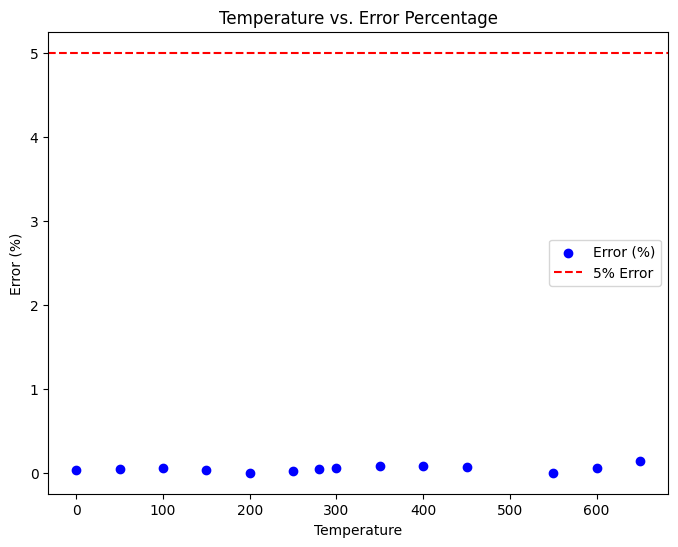

In [ ]:

# Plot the graph
plt.figure(figsize=(8, 6))
plt.scatter(Literature_Value['Temperature'], abs(results[:, 3]), color='blue', label='Error (%)')
plt.axhline(y=5, color='red', linestyle='--', label='5% Error')
plt.xlabel('Temperature')
plt.ylabel('Error (%)')
plt.title('Temperature vs. Error Percentage')
plt.legend()
plt.show()

## Without Transident Curve with Literature data

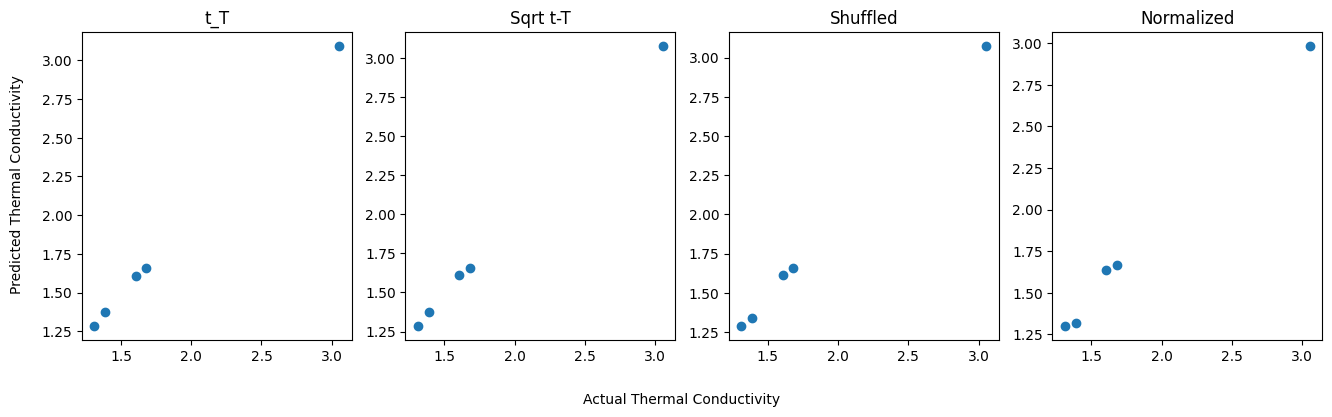

+------------+------------------------+--------------------+
| Data Type  |   Mean Squared Error   |  R-squared score   |
+------------+------------------------+--------------------+
|    t-T     | 0.0005916745110176256  | 0.9985449992165825 |
| Square t-T | 0.00034893419909141985 | 0.9991419276585601 |
|  Shuffled  | 0.0008142350283002874  | 0.9979976953848742 |
| Normalized | 0.0022677067118956153  | 0.9944234287924717 |
+------------+------------------------+--------------------+
0.001 & 0.999
0.0 & 0.999
0.001 & 0.998
0.002 & 0.994


In [ ]:
#Linear Regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()


# Import the data with 200 data points of temperature versus time and n independent parameters for each of the 48 materials

#merge_t_parameter_result = merge_t_parameter_result.apply(pd.to_numeric, errors='coerce')



# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result.iloc[:, :-1]
y_t_T = merge_t_parameter_result.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized.iloc[:, -1]




# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)



# Scale the input features using StandardScaler
#scaler = StandardScaler()
#X_train_shuffled = scaler.fit_transform(X_train_shuffled)
# X_test_shuffled = scaler.transform(X_test_shuffled)


X_train_nomalized = scaler.fit_transform(X_train_nomalized)
X_test_nomalized = scaler.transform(X_test_nomalized)

X_train_shuffled = scaler.fit_transform(X_train_shuffled)
X_test_shuffled = scaler.transform(X_test_shuffled)

# Train a linear regression model
regressor1 = LinearRegression()
regressor2 = LinearRegression()
regressor3 = LinearRegression()
regressor4 = LinearRegression()

regressor1.fit(X_train_t_T, y_train_t_T)
regressor2.fit(X_train_sqrt,y_train_sqrt)
regressor3.fit(X_train_shuffled, y_train_shuffled)
regressor4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = regressor1.predict(X_test_t_T)
y_pred_sqrt = regressor2.predict(X_test_sqrt)
y_pred_shuffled = regressor3.predict(X_test_shuffled)
y_pred_nomalized = regressor4.predict(X_test_nomalized)


# Set up the plot grid
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Create scatter plots on each axis
axs[0].scatter(y_test_t_T, y_pred_t_T)
axs[1].scatter(y_test_sqrt, y_pred_sqrt)
axs[2].scatter(y_test_shuffled, y_pred_shuffled)
axs[3].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0].set_title('t_T')
axs[1].set_title('Sqrt t-T')
axs[2].set_title('Shuffled')
axs[3].set_title('Normalized')

# Set common x and y labels for the plot grid
fig.text(0.5, -0.05, "Actual Thermal Conductivity", ha='center')
fig.text(0.08, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)

from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['t-T', mse_t_T, regressor1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Square t-T', mse_sqrt, regressor2.score(X_test_sqrt, y_test_sqrt)])
table.add_row(['Shuffled', mse_shuffled, regressor3.score(X_test_shuffled, y_test_shuffled)])
table.add_row(['Normalized', mse_nomalized, regressor4.score(X_test_nomalized, y_test_nomalized)])

# print the table as a formatted output
print(table)



# print rounded result

print(mse_t_T.round(3), '&', regressor1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', regressor2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', regressor3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', regressor4.score(X_test_nomalized, y_test_nomalized).round(3))





In [ ]:
y_test_t_T

8     3.054016
13    1.606431
20    1.309965
1     1.389262
11    1.678851
Name: Th.Conductivity, dtype: float64

In [ ]:
Temp_Conductivity = merged_result[['Temperature','Th.Conductivity']]
Temp_Conductivity

,Temperature,Th.Conductivity
0,-10.020000,1.293578
1,22.256376,1.389262
2,973.000000,6.710017
3,954.000000,2.560802
4,853.000000,3.974821
5,753.000000,3.922175
6,702.000000,3.060212
7,651.000000,3.298759
8,600.000000,3.054016
9,549.000000,2.784233


In [ ]:
Literature_Value = {
    'Temperature': [0, 50, 100, 150, 200, 250, 280, 300, 350, 400, 450, 550, 600, 650],
    'Th.Conductivity': [1.348, 1.436, 1.516, 1.57, 1.616, 1.654, 1.679, 1.696, 1.754, 1.825, 1.913, 2.135, 2.282, 2.445]
}

Literature_Value_dataFrame = pd.DataFrame(Literature_Value)
Literature_Value_dataFrame

,Temperature,Th.Conductivity
0,0,1.348
1,50,1.436
2,100,1.516
3,150,1.570
4,200,1.616
5,250,1.654
6,280,1.679
7,300,1.696
8,350,1.754
9,400,1.825


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-52-ca26f0273c63>:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train_t_T, y_train_t_T)


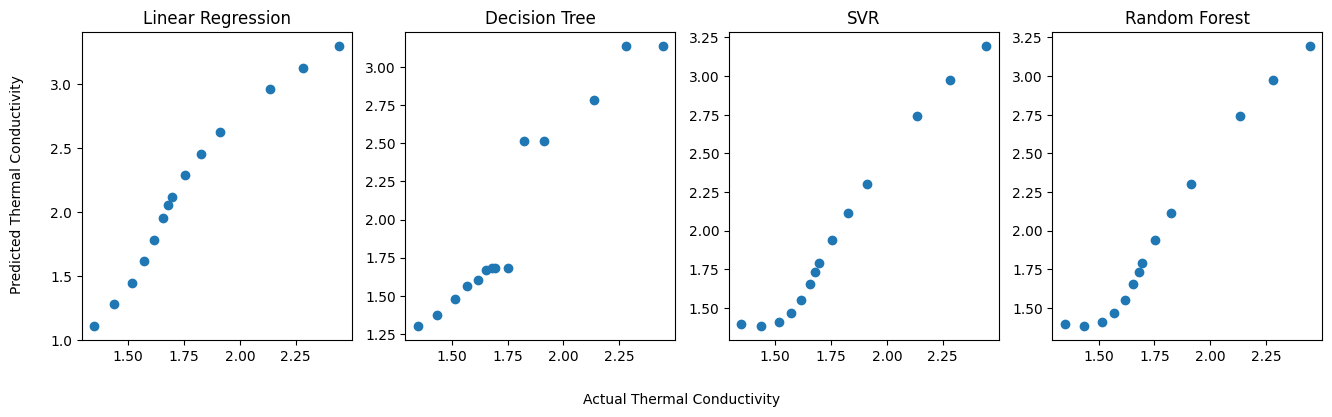

+-------------------+-----------------------+---------------------+
|     Data Type     |   Mean Squared Error  |   R-squared score   |
+-------------------+-----------------------+---------------------+
| Linear Regression | 0.0005916745110176256 |  -1.91293804788461  |
|   Decision Tree   |  0.12286459475331313  | -0.8827306754933848 |
|        SVR        |  0.12286459475331313  | -0.3038568687864811 |
|   Random Forest   |  0.12286459475331313  | -0.6697504230375919 |
+-------------------+-----------------------+---------------------+
0.274 & -1.913
0.177 & -0.883
0.123 & -0.304
0.123 & -0.67


In [ ]:
#Linear Regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()


# Split the data into training and testing sets

X_train_t_T = Temp_Conductivity[['Temperature']]
y_train_t_T = Temp_Conductivity[['Th.Conductivity']]
X_test_t_T = Literature_Value_dataFrame[['Temperature']]
y_test_t_T = Literature_Value_dataFrame[['Th.Conductivity']]


# Train a linear regression model
regressor1 = LinearRegression()
model1 = DecisionTreeRegressor(max_depth=5)
model2 = SVR(kernel='rbf', degree = 10)
model3 = RandomForestRegressor(n_estimators=1000, random_state=0)


regressor1.fit(X_train_t_T, y_train_t_T)
model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_t_T, y_train_t_T)
model3.fit(X_train_t_T, y_train_t_T)


# Make predictions on the testing data
y_pred_Linear = regressor1.predict(X_test_t_T)
y_pred_DT = model1.predict(X_test_t_T)
y_pred_SVR = model2.predict(X_test_t_T)
y_pred_RF = model2.predict(X_test_t_T)
#y_pred_nomalized = regressor4.predict(X_test_nomalized)




# Set up the plot grid
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Create scatter plots on each axis
axs[0].scatter(y_test_t_T, y_pred_Linear)
axs[1].scatter(y_test_t_T, y_pred_DT)
axs[2].scatter(y_test_t_T, y_pred_SVR)
axs[3].scatter(y_test_t_T, y_pred_RF)


# Add title to each subplot
axs[0].set_title('Linear Regression')
axs[1].set_title('Decision Tree')
axs[2].set_title('SVR')
axs[3].set_title('Random Forest')

# Set common x and y labels for the plot grid
fig.text(0.5, -0.05, "Actual Thermal Conductivity", ha='center')
fig.text(0.08, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_Linear = mean_squared_error(y_test_t_T, y_pred_Linear)
mse_DT = mean_squared_error(y_test_t_T, y_pred_DT)
mse_SVR = mean_squared_error(y_test_t_T, y_pred_SVR)
mse_RF = mean_squared_error(y_test_t_T, y_pred_RF)

from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['Linear Regression', mse_t_T, regressor1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Decision Tree ', mse_RF, model1.score(X_test_t_T, y_test_t_T)])
table.add_row(['SVR', mse_SVR, model2.score(X_test_t_T, y_test_t_T)])
table.add_row(['Random Forest', mse_RF, model3.score(X_test_t_T, y_test_t_T)])

# print the table as a formatted output
print(table)



# print rounded result

print(mse_Linear.round(3), '&', regressor1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_DT.round(3),'&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_SVR.round(3),'&', model2.score(X_test_t_T, y_test_t_T).round(3))
print(mse_RF.round(3),'&', model3.score(X_test_t_T, y_test_t_T).round(3))


